<ipython-input-5-a8527b3e8fdf>:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./bitUSD_data.csv')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pyla

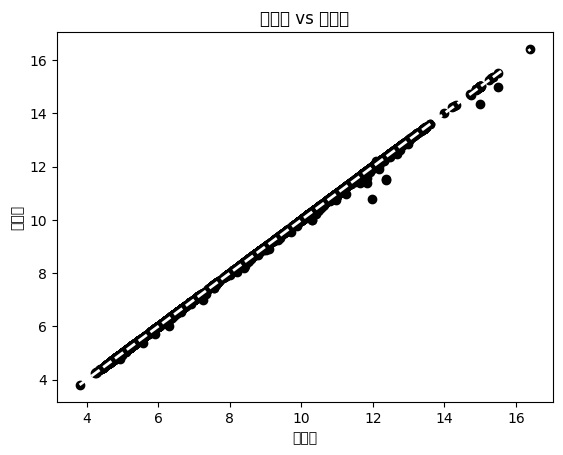

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

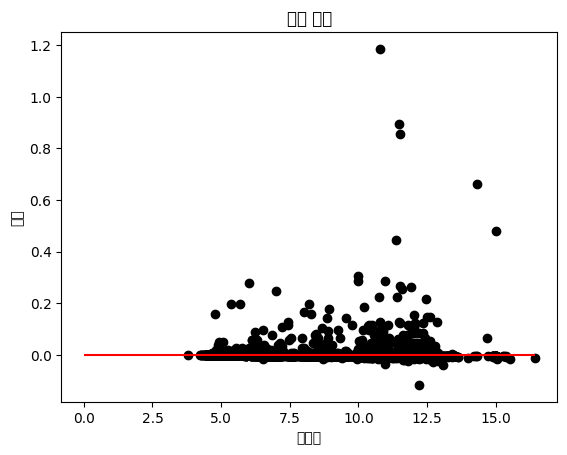

In [5]:
from matplotlib.lines import lineStyles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./bitUSD_data.csv')

features = ["Open","Low","Volume_BTC","Volume_USD"]
target = "High"

df.rename(columns = {'Volume_(Currency)':'Volume_USD', 'Volume_(BTC)':'Volume_BTC'}, inplace = True)
df = df[features + [target]]
df.dropna(inplace=True) #결측값 제거
df.drop_duplicates(inplace=True) #중복행 제거

fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')

x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3)
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

plt.scatter(y_test,predictions,color='black')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linestyle='--',color = 'red',linewidth=2)
plt.title('실제값 vs 예측값')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.show()


y_prediction = model.predict(x_test)
residuals = y_test - y_prediction

plt.scatter(y_prediction, residuals, color='black')
plt.hlines(y=0, xmin=0, xmax=max(y_prediction), color='red')
plt.title('잔차 계산')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.show()